## Task 1: Concept Question

### 1.1 Neural Nets: 

####  1.1.1 Output P(y=1|x,w)

$ g(w_{7}+w_8h(w_1+w_3x_1+w_5x_2)+w_9h(w_2+w_4x_1+w_6x_2)) =  \frac{1}{1+e^-(w_7+cw_8w_1+cw_9w_2+(cw_8w_3+cw_9w_4)x_1+(cw_8w_5+cw_9w_6)x_2)}$

#### 1.1.2 Multi-layered neural net

True. With all linear actived hidden layers, the output from the hidden layer will be linearly combine with the input features and the output will multiplied by the input then the hidden layer will be gradually removed but with the same result. With this approach, we are able to get an neural network without hidden layers.

### 1.2 Support Vector Machines

#### 1.2.1 Linearly separable

$0 \leq h \leq 1$ training points are still linearly separable

#### 1.2.2 Maximum margin decision boundary

No, because x1 x2 and x3 are still support vectors which will not change the orientation.

#### 1.2.3 Margin achieved

Margin is $m(h) = 0$ when $h = 1$

Margin is $m(h) = 1/\sqrt{2}$ when $h =0$

We can get Margin is $(1-h)/\sqrt{2}$  when  $0 \leq h \leq 1$ and 0 when $h > 1$

## Task 2: Programming Question

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 8.6 MB/s 


In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import tensorflow as tf 

In [3]:
import torch
device = torch.device("cuda:{}".format(0) if torch.cuda.is_available() else "cpu")
print(device)

cpu


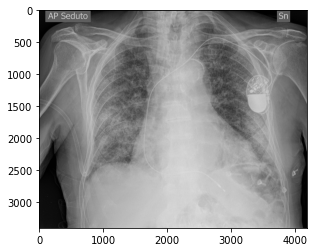

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import cv2 
from tensorflow import keras
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
plt.imshow(cv2.imread("/gdrive/MyDrive/data_set/train/PNEUMONIA/7E335538-2F86-424E-A0AB-6397783A38D0.jpeg"))

Preview of the image from dataset

In [5]:
train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_data.flow_from_directory('/gdrive/MyDrive/data_set/train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

test_data = ImageDataGenerator(rescale = 1./255)
test_set = test_data.flow_from_directory("/gdrive/MyDrive/data_set/test", target_size=(64, 64),batch_size=32,class_mode='binary')
image_data = ImageDataGenerator(rotation_range=20, width_shift_range=0.10, height_shift_range=0.10, rescale=1/255, shear_range=0.1,zoom_range=0.1, horizontal_flip=True, fill_mode='nearest' )

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Get known with the amount of data we have for training and testing

In [6]:
model = Sequential()
image_shape = (1000,1000,3)

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))#convolution layer #1
model.add(MaxPooling2D(pool_size=(2, 2)))#maxpooling layer #1

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))#convolution layer #2
model.add(MaxPooling2D(pool_size=(2, 2)))#maxpooling layer #1

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))#convolution layer #3
model.add(MaxPooling2D(pool_size=(2, 2)))#maxpooling layer #1


model.add(Flatten())#faltten the output from previous layer


model.add(Dense(128))#fully connected nerual network layer
model.add(Activation('relu'))


model.add(Dropout(0.5))#dropout layer to prevent overfitting

model.add(Dense(1))# output layer with 1 target feature
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

constructing our model with first adding 3 3x3 Convoltional kernel layers with 32 ,64,64 numbers of filters,plus maxpolling layers and then followed by neural network with 128 nerual nodes and one dropout layer to prevent overfitting.

In [7]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 16

train_path='/gdrive/MyDrive/data_set/train'
train_image_data = image_data.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_path='/gdrive/MyDrive/data_set/test'
test_image_data = image_data.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

results = model.fit(train_image_data,epochs=10, validation_data=test_image_data,callbacks=[early_stop])

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 371s 36s/step - loss: 4.0069 - accuracy: 0.5541 - val_loss: 0.6020 - val_accuracy: 0.5750
Epoch 2/10
10/10 [==============================] - 339s 33s/step - loss: 0.6753 - accuracy: 0.6014 - val_loss: 0.3732 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 332s 32s/step - loss: 0.4708 - accuracy: 0.7905 - val_loss: 0.2406 - val_accuracy: 0.9250
Epoch 4/10
10/10 [==============================] - 315s 31s/step - loss: 0.4503 - accuracy: 0.8446 - val_loss: 0.2041 - val_accuracy: 0.9500
Epoch 5/10
10/10 [==============================] - 323s 32s/step - loss: 0.4755 - accuracy: 0.8041 - val_loss: 0.2300 - val_accuracy: 0.9250
Epoch 6/10
10/10 [==============================] - 331s 33s/step - loss: 0.4669 - accuracy: 0.7973 - val_loss: 0.1214 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 313s 31s/step -

(       loss  accuracy  val_loss  val_accuracy
 0  4.006866  0.554054  0.602048         0.575
 1  0.675346  0.601351  0.373235         1.000
 2  0.470838  0.790541  0.240625         0.925
 3  0.450289  0.844595  0.204058         0.950
 4  0.475460  0.804054  0.229989         0.925,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb04aca69d0>)

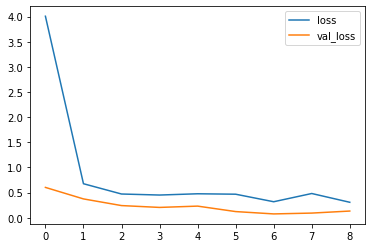

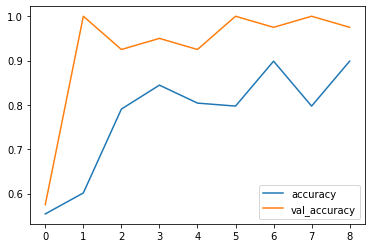

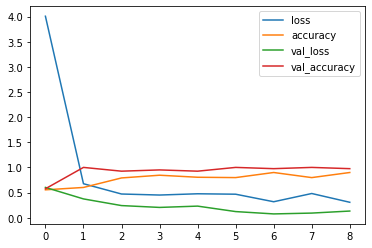

In [8]:
losses = pd.DataFrame(model.history.history)
losses.head(), losses[['loss','val_loss']].plot() ,losses[['accuracy','val_accuracy']].plot() ,losses.plot()

Plots showing the performence of our model, we can see the model onverged to 0.2 loss with around 82% accuracy it looks pretty good

In [9]:
model.evaluate(test_image_data)

3/3 [==============================] - 31s 7s/step - loss: 0.1385 - accuracy: 0.9750


[0.13851018249988556, 0.9750000238418579]

Final evaluate for our model we end up got 0.1385 loss with 97.5% accuracy, we accept this output


In [19]:
pred_chance = model.predict_generator(test_image_data)
pred_chance
test_image_data.classes
print("True values for prediction testing:")
print(test_image_data.classes)
predictions = pred_chance > 0.5
print("Predicted values for tprediction testing:")
print(predictions)

correct =0
incorrect =0

for i in range(len(test_image_data.classes)):
  if test_image_data.classes[i] ==predictions[i][0] :
    correct+=1
  else:
    incorrect +=1
print("correct prediction count:",correct)
print("incorrect prediction count:",incorrect)
print("prediction accuracy:",correct/40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


True values for prediction testing:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Predicted values for tprediction testing:
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
correct prediction count: 40
incorrect prediction count: 0
prediction accuracy: 1.0


With help of convolutional layers followed by nerual network + dropout layers our model is able to classify the x-ray image from the dataset correctly.